# Assignment 2 - Q02

Data Preparation and Preprocessing 
- Dataset Loading and Filtering of classes
- Image Normalization and Resizing
- Organized Data pipeline                                                                                                                      

Custom GAN Architecture
- Generator Implementation (Implements the generator as discussed in class, with correct layers and output dimensions)
- Creates a custom discriminator that takes two images (generated and real) and computes a similarity score.
- Loss Functions and Optimizers

## 1. Dataset Loading

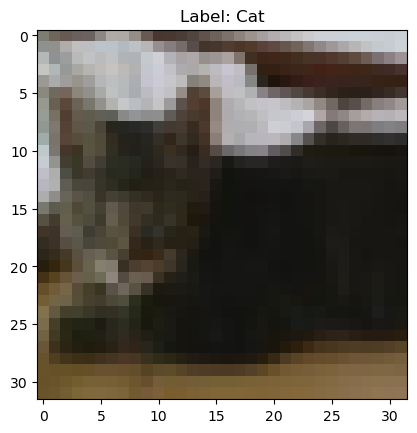

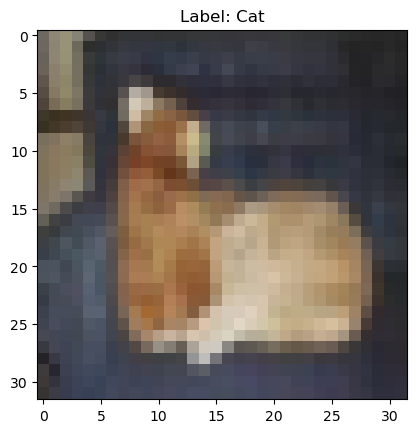

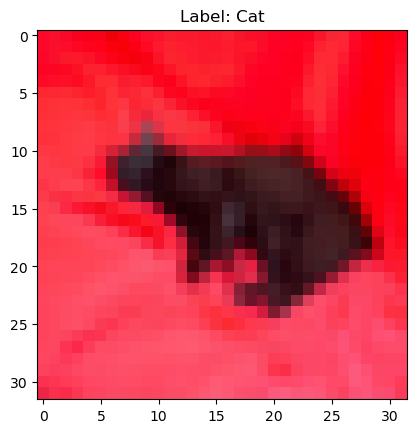

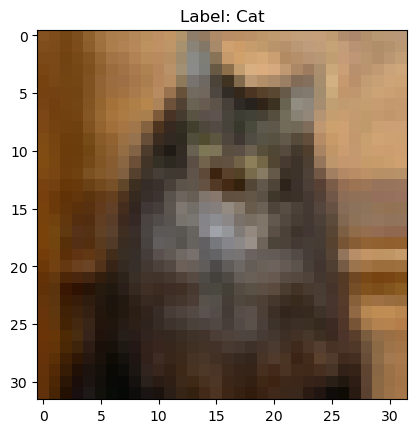

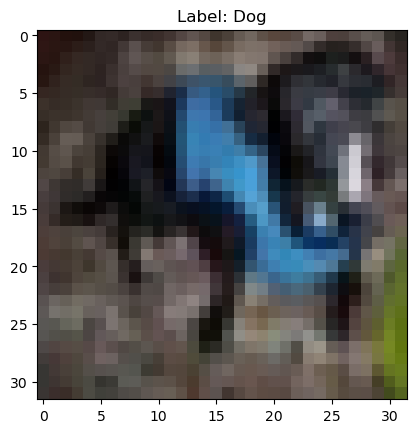

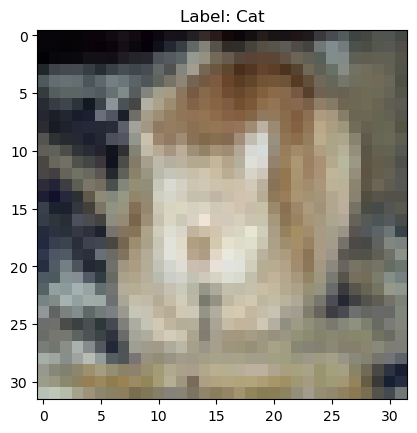

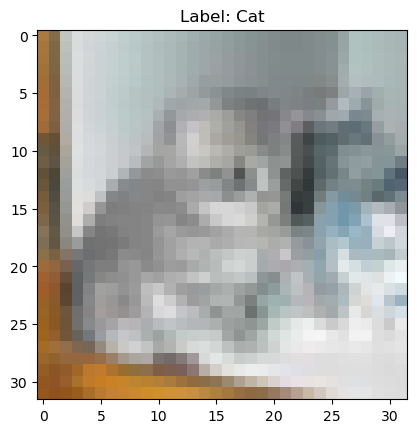

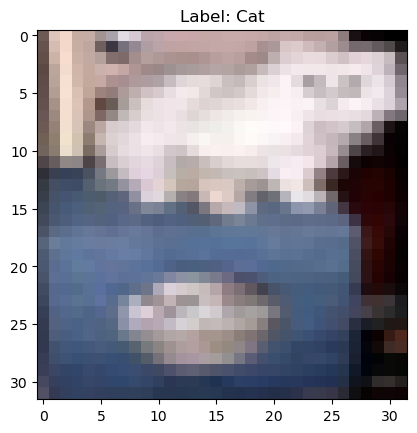

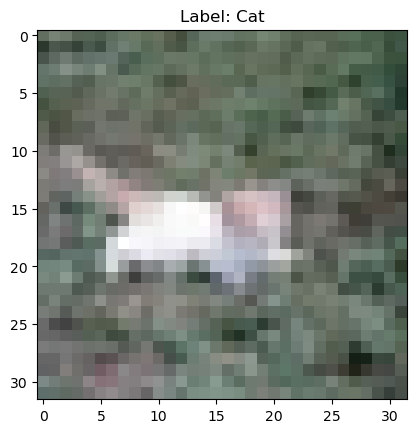

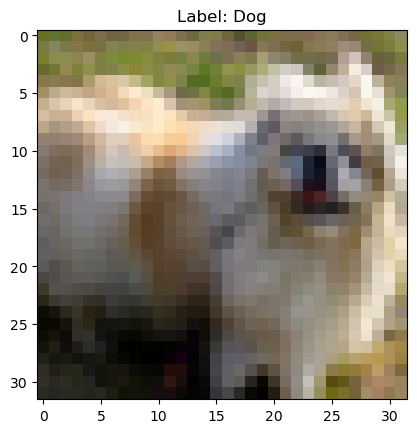

In [7]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# Define CIFAR-10 label indices (adjust if using CIFAR-100 and different labels)
CAT_LABEL = 3
DOG_LABEL = 5

# Function to load a CIFAR batch file
def load_cifar_batch(file_path):
    with open(file_path, 'rb') as f:
        batch = pickle.load(f, encoding='bytes')
    return batch

# Function to extract cat and dog images from a batch
def get_cat_dog_images(batch):
    data = batch[b'data']
    labels = batch[b'labels']  # Use [b'fine_labels'] for CIFAR-100 if needed

    # Find indices of cat and dog images
    cat_dog_indices = [i for i, label in enumerate(labels) if label == CAT_LABEL or label == DOG_LABEL]

    # Extract images and labels for cats and dogs
    images = data[cat_dog_indices]
    labels = [labels[i] for i in cat_dog_indices]
    
    # Reshape images to 32x32x3
    images = images.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
    
    return images, labels

# Load a batch file and get cat and dog images
file_path = 'C:\\Users\\Zunaira\\Downloads\\Compressed\\cifar-10-python\\cifar-10-batches-py\\data_batch_1'  # Path to your CIFAR batch file
batch = load_cifar_batch(file_path)
cat_dog_images, cat_dog_labels = get_cat_dog_images(batch)

# Display a few cat and dog images
for i in range(10):
    plt.imshow(cat_dog_images[i])
    label = "Cat" if cat_dog_labels[i] == CAT_LABEL else "Dog"
    plt.title(f"Label: {label}")
    plt.show()


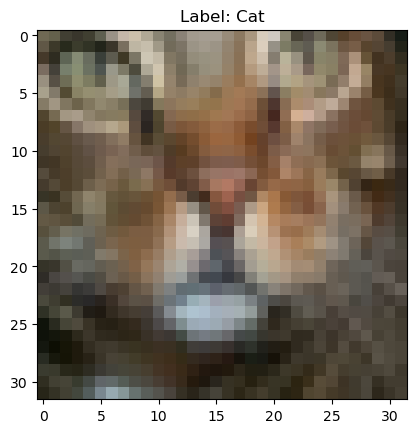

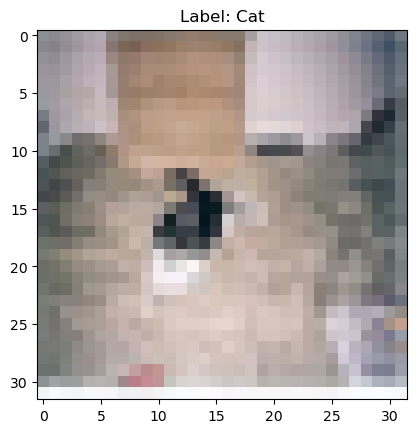

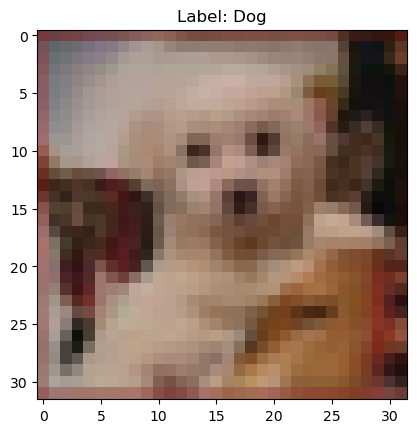

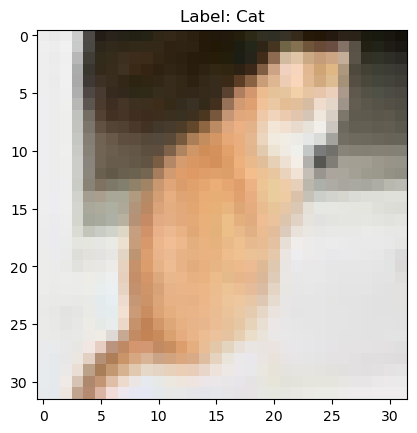

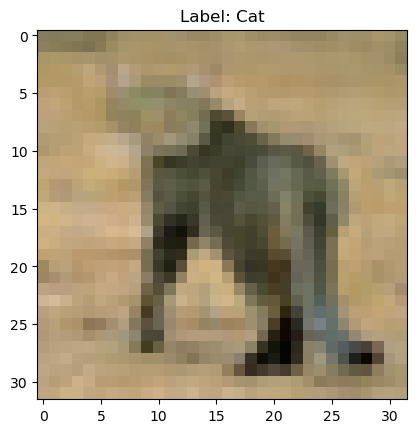

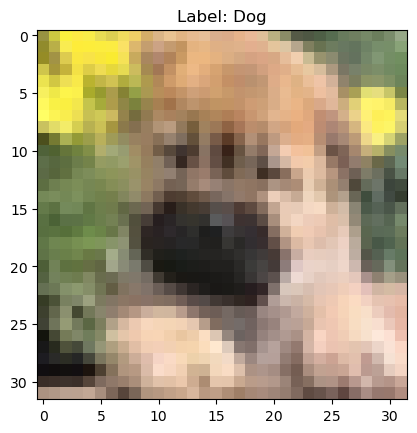

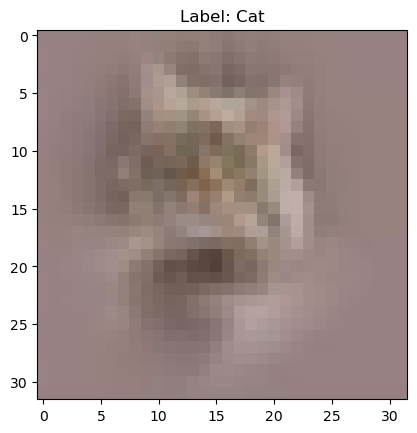

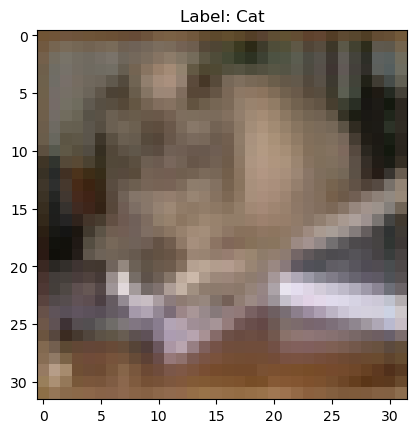

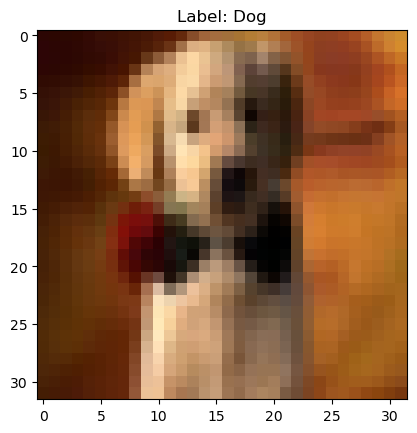

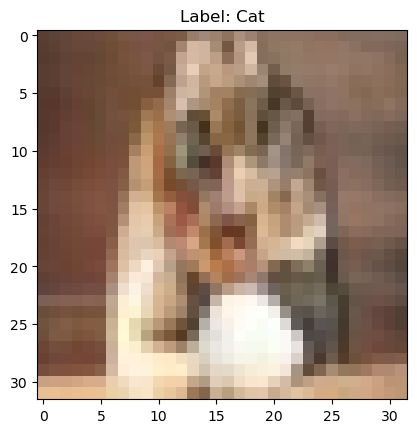

In [8]:
# Load a batch file and get cat and dog images
file_path = 'C:\\Users\\Zunaira\\Downloads\\Compressed\\cifar-10-python\\cifar-10-batches-py\\data_batch_2'  # Path to your CIFAR batch file
batch = load_cifar_batch(file_path)
cat_dog_images, cat_dog_labels = get_cat_dog_images(batch)

# Display a few cat and dog images
for i in range(10):
    plt.imshow(cat_dog_images[i])
    label = "Cat" if cat_dog_labels[i] == CAT_LABEL else "Dog"
    plt.title(f"Label: {label}")
    plt.show()

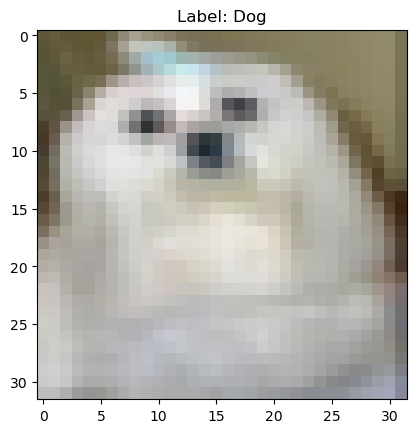

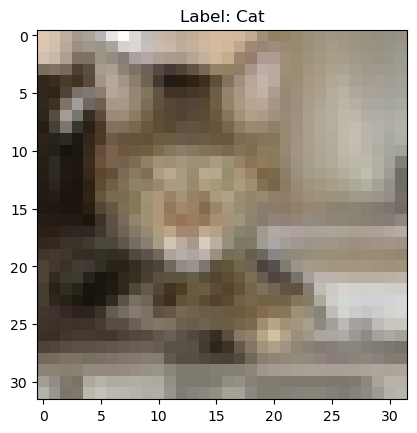

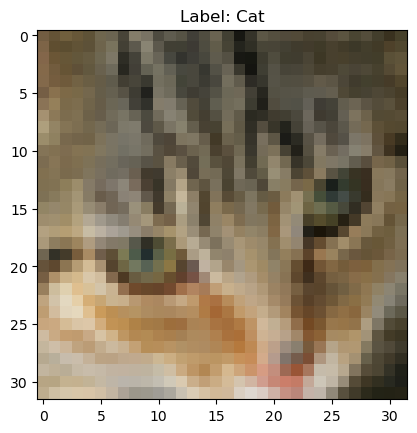

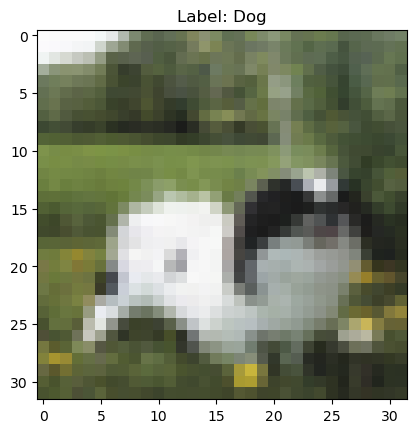

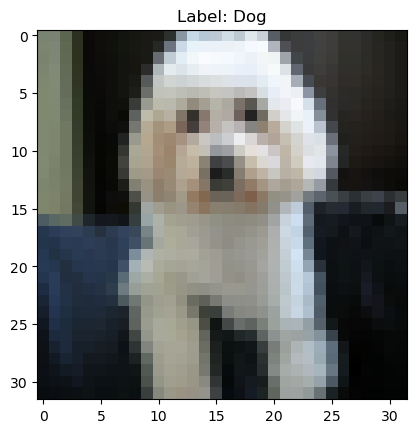

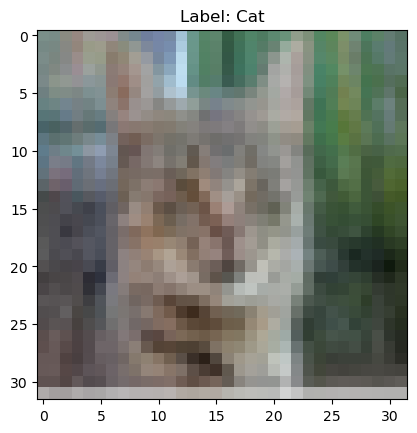

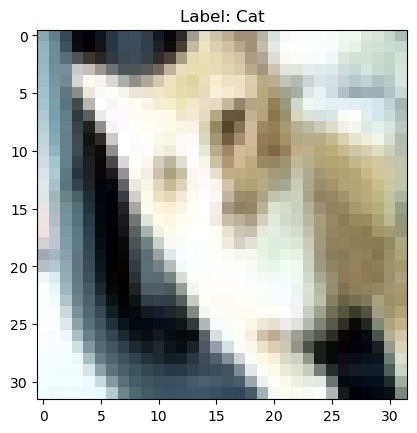

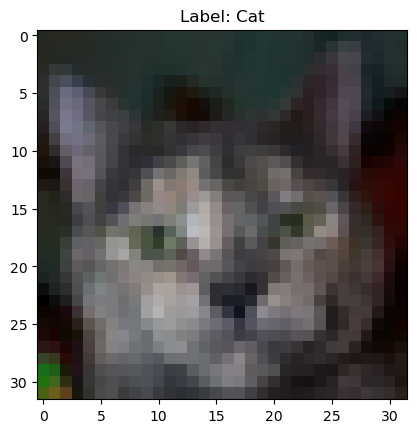

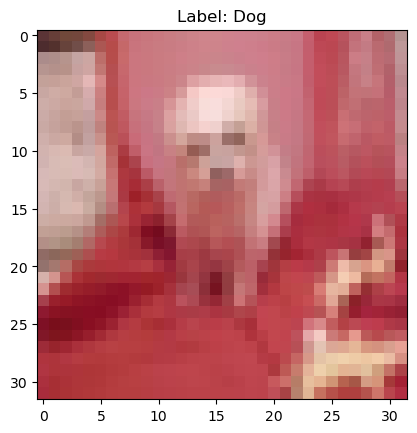

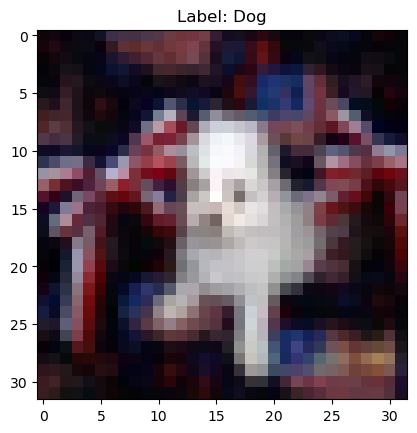

In [9]:
# Load a batch file and get cat and dog images
file_path = 'C:\\Users\\Zunaira\\Downloads\\Compressed\\cifar-10-python\\cifar-10-batches-py\\data_batch_3'  # Path to your CIFAR batch file
batch = load_cifar_batch(file_path)
cat_dog_images, cat_dog_labels = get_cat_dog_images(batch)

# Display a few cat and dog images
for i in range(10):
    plt.imshow(cat_dog_images[i])
    label = "Cat" if cat_dog_labels[i] == CAT_LABEL else "Dog"
    plt.title(f"Label: {label}")
    plt.show()

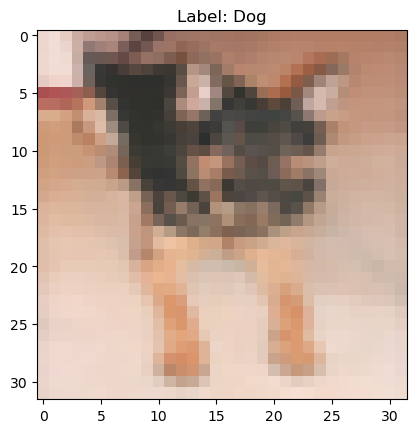

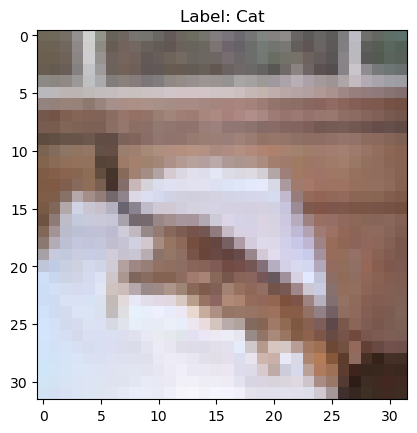

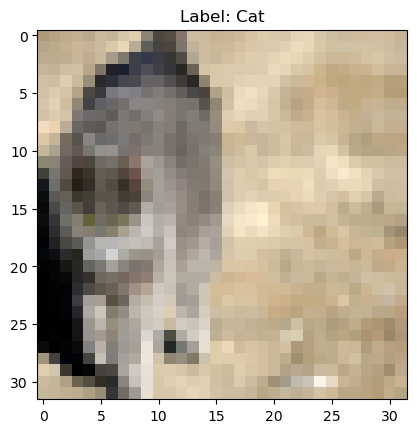

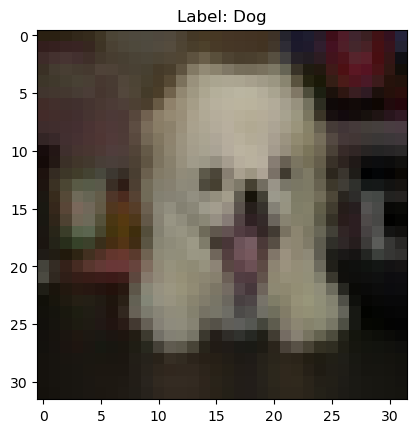

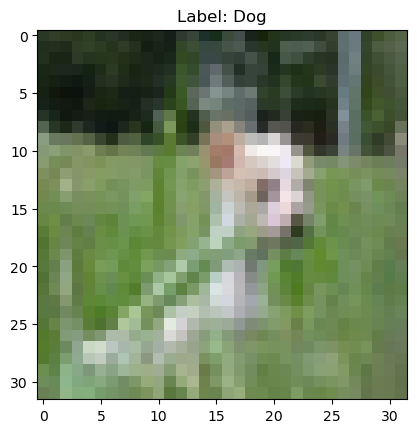

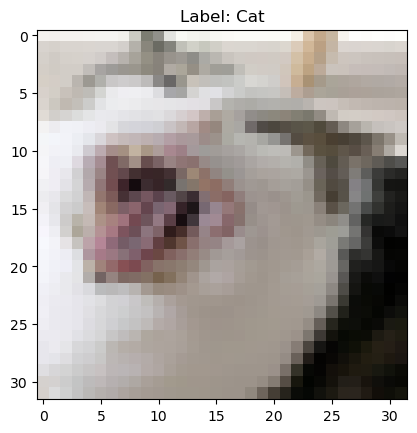

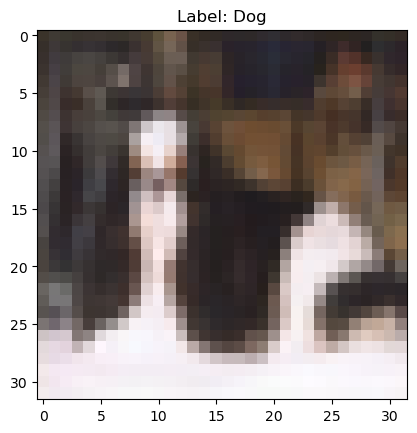

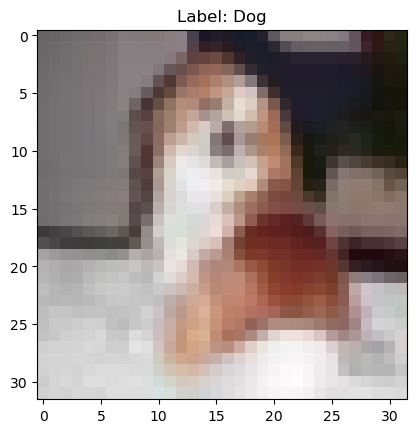

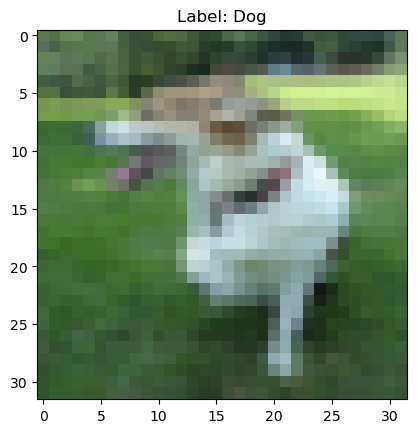

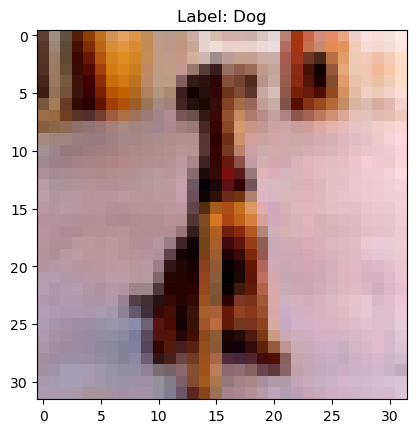

In [10]:
# Load a batch file and get cat and dog images
file_path = 'C:\\Users\\Zunaira\\Downloads\\Compressed\\cifar-10-python\\cifar-10-batches-py\\data_batch_4'  # Path to your CIFAR batch file
batch = load_cifar_batch(file_path)
cat_dog_images, cat_dog_labels = get_cat_dog_images(batch)

# Display a few cat and dog images
for i in range(10):
    plt.imshow(cat_dog_images[i])
    label = "Cat" if cat_dog_labels[i] == CAT_LABEL else "Dog"
    plt.title(f"Label: {label}")
    plt.show()

## Extracting Images 

## Image Resizing

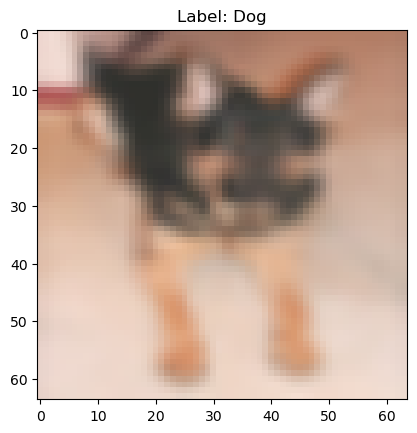

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import cv2  # OpenCV library for resizing

# Assuming `cat_dog_images` contains the filtered cat and dog images
# Normalize the image data to the range [0, 1]
normalized_images = cat_dog_images / 255.0

# Resize images to a new size (e.g., 64x64 pixels)
resized_images = np.array([cv2.resize(img, (64, 64)) for img in normalized_images])

# Display the first resized and normalized image as an example
plt.imshow(resized_images[0])
plt.title(f"Label: {'Cat' if cat_dog_labels[0] == CAT_LABEL else 'Dog'}")
plt.show()


## Custom GAN

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader


In [11]:
# Hyperparameters
latent_dim = 100
batch_size = 64
image_size = 32
num_epochs = 50
lr = 0.0002
beta1 = 0.5

# Data transforms and loading the CIFAR-10 dataset
transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)


Files already downloaded and verified


## Generator

In [3]:
class Generator(nn.Module):
    def __init__(self, latent_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.ReLU(True),
            nn.Linear(256, 512),
            nn.ReLU(True),
            nn.Linear(512, 1024),
            nn.ReLU(True),
            nn.Linear(1024, 3 * image_size * image_size),
            nn.Tanh()
        )

    def forward(self, z):
        img = self.model(z)
        img = img.view(z.size(0), 3, image_size, image_size)
        return img


## Discriminator

In [4]:
class CustomDiscriminator(nn.Module):
    def __init__(self):
        super(CustomDiscriminator, self).__init__()
        
        # Shared feature extractor layers
        self.feature_extractor = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),

            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),

            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3)
        )

        self.fc = nn.Sequential(
            nn.Linear(256 * 4 * 4, 1),
            nn.Sigmoid()
        )

    def forward(self, real_img, gen_img):
        # Extract features from both real and generated images
        real_features = self.feature_extractor(real_img).view(real_img.size(0), -1)
        gen_features = self.feature_extractor(gen_img).view(gen_img.size(0), -1)
        
        # Compute similarity using the absolute difference (L1 distance)
        similarity = torch.abs(real_features - gen_features)
        validity = self.fc(similarity)
        
        return validity


In [8]:
import torch

# Check if GPU is available and set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Create instances of the Generator and Discriminator
generator = Generator(latent_dim).to(device)
discriminator = CustomDiscriminator().to(device)

# Optimizers for both the generator and discriminator
optimizer_G = optim.Adam(generator.parameters(), lr=lr, betas=(beta1, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr, betas=(beta1, 0.999))



## Calculating Loss

In [9]:
# Loss function
adversarial_loss = nn.BCELoss()


In [12]:
for epoch in range(num_epochs):
    for i, (imgs, _) in enumerate(train_loader):
        real_imgs = imgs.to(device)
        batch_size = real_imgs.size(0)

        # Labels for real and fake images
        valid = torch.ones(batch_size, 1, device=device, dtype=torch.float)
        fake = torch.zeros(batch_size, 1, device=device, dtype=torch.float)

        # --------------------
        # Train the Generator
        # --------------------
        optimizer_G.zero_grad()

        # Generate a batch of fake images
        z = torch.randn(batch_size, latent_dim, device=device)
        gen_imgs = generator(z)

        # Loss for the generator: try to generate images similar to real images
        g_loss = adversarial_loss(discriminator(real_imgs, gen_imgs), valid)

        g_loss.backward()
        optimizer_G.step()

        # -----------------------
        # Train the Discriminator
        # -----------------------
        optimizer_D.zero_grad()

        # Discriminator loss on real and fake pairs
        real_loss = adversarial_loss(discriminator(real_imgs, real_imgs), valid)
        fake_loss = adversarial_loss(discriminator(real_imgs, gen_imgs.detach()), fake)
        d_loss = (real_loss + fake_loss) / 2

        d_loss.backward()
        optimizer_D.step()

        # Print progress
        if i % 100 == 0:
            print(f"[Epoch {epoch}/{num_epochs}] [Batch {i}/{len(train_loader)}] [D loss: {d_loss.item()}] [G loss: {g_loss.item()}]")


[Epoch 0/50] [Batch 0/782] [D loss: 0.03746294975280762] [G loss: 4.842344760894775]
[Epoch 0/50] [Batch 100/782] [D loss: 0.023031890392303467] [G loss: 5.978495121002197]
[Epoch 0/50] [Batch 200/782] [D loss: 0.00837312638759613] [G loss: 7.105408668518066]
[Epoch 0/50] [Batch 300/782] [D loss: 0.007498438004404306] [G loss: 7.946082592010498]
[Epoch 0/50] [Batch 400/782] [D loss: 0.003910156432539225] [G loss: 8.308815002441406]
[Epoch 0/50] [Batch 500/782] [D loss: 0.0009133971761912107] [G loss: 11.195136070251465]
[Epoch 0/50] [Batch 600/782] [D loss: 0.0009053463581949472] [G loss: 11.176591873168945]
[Epoch 0/50] [Batch 700/782] [D loss: 0.0015745707787573338] [G loss: 11.486165046691895]
[Epoch 1/50] [Batch 0/782] [D loss: 0.0013254772638902068] [G loss: 10.897204399108887]
[Epoch 1/50] [Batch 100/782] [D loss: 0.000735991052351892] [G loss: 12.009933471679688]
[Epoch 1/50] [Batch 200/782] [D loss: 0.0001467899273848161] [G loss: 12.698434829711914]
[Epoch 1/50] [Batch 300/782

# Save Model 

In [13]:
import torch

# Directory to save model checkpoints
save_dir = '.'

# Ensure that the save directory exists
import os
os.makedirs(save_dir, exist_ok=True)

In [14]:
# Save the generator and discriminator models at the end of each epoch
torch.save(generator.state_dict(), f'{save_dir}/generator_epoch_{epoch+1}.pth')
torch.save(discriminator.state_dict(), f'{save_dir}/discriminator_epoch_{epoch+1}.pth')
print(f"Models saved after epoch {epoch+1}")

Models saved after epoch 50


In [ ]:
generator.load_state_dict(torch.load('./generator_epoch_10.pth'))
discriminator.load_state_dict(torch.load('./discriminator_epoch_10.pth'))


## Calculate Similarity 

In [15]:
import torch

def calculate_similarity(generator, discriminator, real_images, device):
    # Ensure model is in evaluation mode
    generator.eval()
    discriminator.eval()

    # Create noise vectors for generating fake images
    batch_size = real_images.size(0)
    z = torch.randn(batch_size, latent_dim, device=device)
    
    # Generate fake images using the generator
    with torch.no_grad():
        fake_images = generator(z)

    # Calculate similarity scores for each pair of real and fake images
    similarity_scores = discriminator(real_images, fake_images)

    return similarity_scores

# Get a batch of real images from the DataLoader
real_images, _ = next(iter(train_loader))
real_images = real_images.to(device)

# Calculate the similarity scores using the trained generator and discriminator
similarity_scores = calculate_similarity(generator, discriminator, real_images, device)

# Display the similarity scores
print("Similarity scores for the batch of real and generated images:")
print(similarity_scores)


Similarity scores for the batch of real and generated images:
tensor([[9.4241e-36],
        [1.0125e-34],
        [0.0000e+00],
        [1.1981e-38],
        [1.3374e-32],
        [0.0000e+00],
        [3.2834e-32],
        [5.4843e-37],
        [2.8041e-33],
        [2.2965e-35],
        [0.0000e+00],
        [0.0000e+00],
        [0.0000e+00],
        [4.3742e-37],
        [1.6987e-26],
        [1.8797e-27],
        [5.5539e-28],
        [0.0000e+00],
        [0.0000e+00],
        [0.0000e+00],
        [5.6505e-25],
        [1.1325e-27],
        [4.1269e-32],
        [0.0000e+00],
        [0.0000e+00],
        [2.6436e-35],
        [5.7642e-37],
        [6.8273e-21],
        [2.3260e-34],
        [7.1989e-25],
        [7.3259e-30],
        [8.1682e-36],
        [0.0000e+00],
        [0.0000e+00],
        [0.0000e+00],
        [3.7194e-32],
        [0.0000e+00],
        [1.7103e-30],
        [0.0000e+00],
        [8.4998e-27],
        [9.7883e-33],
        [1.4612e-26],
        [0.000